In [1]:
import torch 

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

#### **Bigram Language Model**
<p>
    We are always working with 2 char at a time... and try to predict the next char in the sequence in that little local structure... <br>
    It's a simple and weak language model <br>

Bigram --> tuple of two chars
</p>

In [7]:
b = {}

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)

In [8]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [11]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [12]:
itos = {i:s for s,i in stoi.items()}

In [13]:
import matplotlib.pyplot as plt

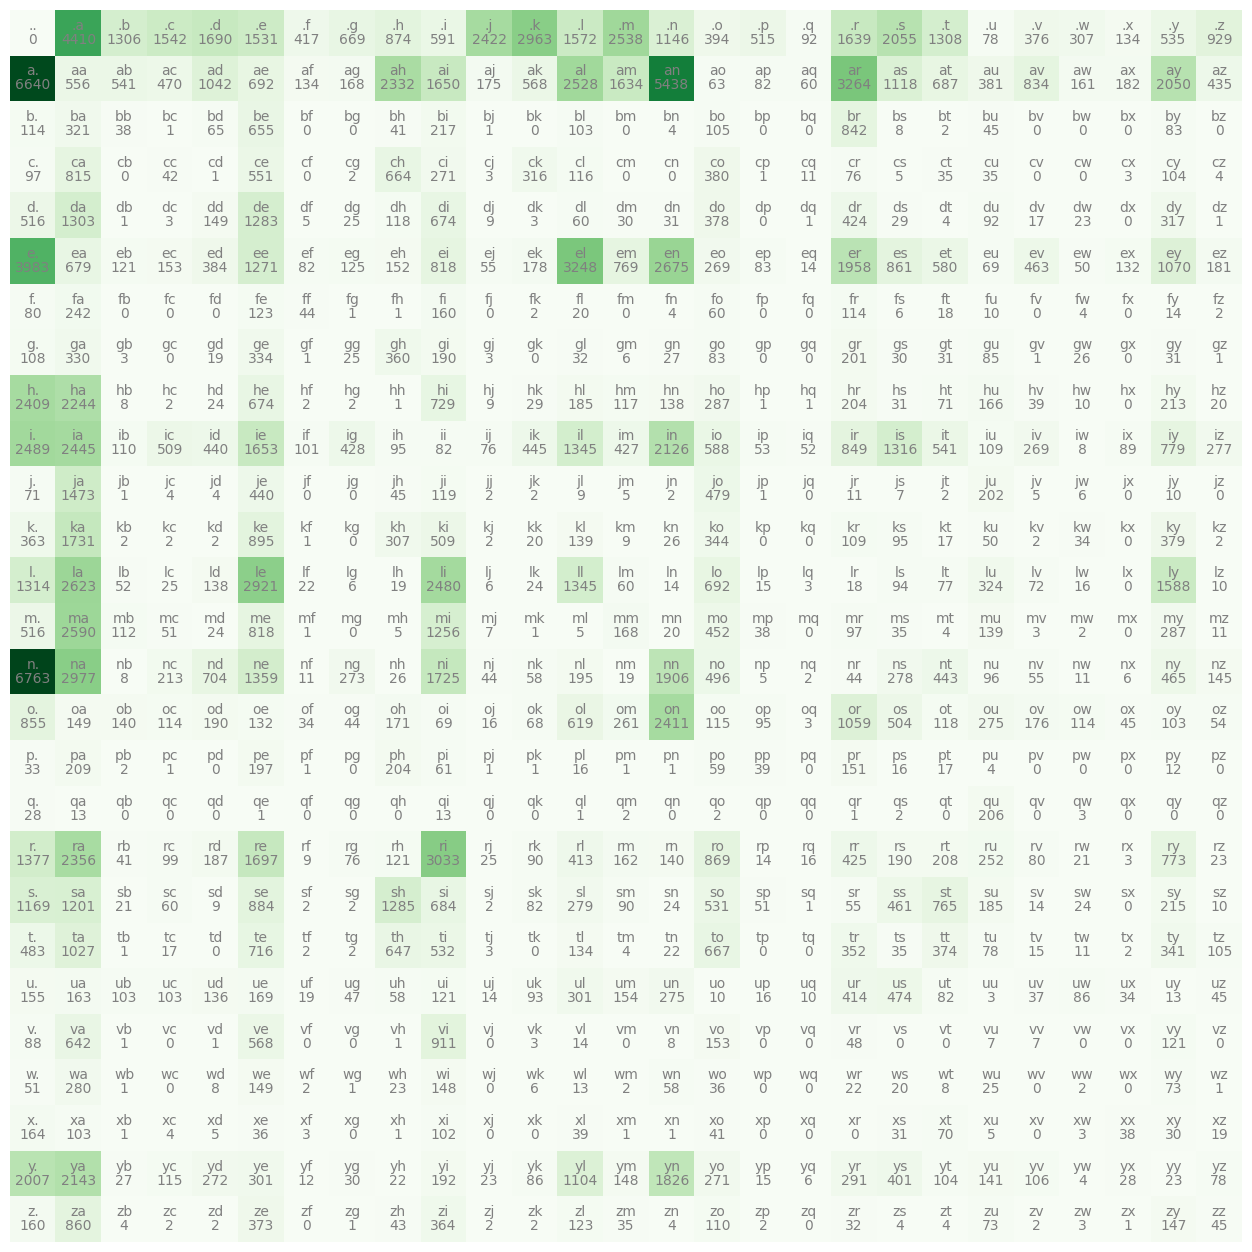

In [14]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Greens')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [15]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [16]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [17]:
# gen = torch.Generator().manual_seed(2147483647)
# ix = torch.multinomial(p, num_samples=1, replacement=True, generator=gen).item()
# ix

In [18]:
P = (N+1).float() # smoothen our model by adding a fake count to each 0 val, so taht i dont 'inf' likelihood
P /= P.sum(1, keepdim=True)
P[0]

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])

In [19]:
P.sum(1, keepdim=True).shape # sum along axis=1 (rows sum)

torch.Size([27, 1])

In [20]:
gen = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:

        # Trained on biagram
        p = P[ix]
        # p = N[ix].float()
        # p /= p.sum()

        # No trained, everything is equally likely
        # p = torch.ones(27) / 27.0
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=gen).item()
        # print(itos[ix])
        out.append(itos[ix])
        if ix == 0:
            break;
    
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [21]:
log_like = 0.0
n = 0
for w in words[:2]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        # Log likelihood
        log_prob = torch.log(prob)
        log_like += log_prob
        n += 1
        print(f'{ch1} {ch2} : {prob :.4f}  {log_prob :.4f}')

print('log_likelihood : ', log_like)
nll = -log_like
print('Neg log_likelihood : ', nll)
print(f'nll_noramlised : {nll/n}') # lower the better

. e : 0.0478  -3.0410
e m : 0.0377  -3.2793
m m : 0.0253  -3.6753
m a : 0.3885  -0.9454
a . : 0.1958  -1.6305
. o : 0.0123  -4.3965
o l : 0.0779  -2.5526
l i : 0.1774  -1.7293
i v : 0.0152  -4.1845
v i : 0.3508  -1.0476
i a : 0.1380  -1.9807
a . : 0.1958  -1.6305
log_likelihood :  tensor(-30.0933)
Neg log_likelihood :  tensor(30.0933)
nll_noramlised : 2.5077781677246094


#### **Our need**
<p>
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling) <br>
# equivalent to maximizing the log likelihood (because log is monotonic) <br>
# equivalent to minimizing the negative log likelihood <br>
# equivalent to minimizing the average negative log likelihood
</p>

In [22]:
log_like = 0.0
n = 0
for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        # Log likelihood
        log_prob = torch.log(prob)
        log_like += log_prob
        n += 1
        print(f'{ch1} {ch2} : {prob :.4f}  {log_prob :.4f}')

print('log_likelihood : ', log_like)
nll = -log_like
print('Neg log_likelihood : ', nll)
print(f'nll_noramlised : {nll/n}') # lower the better

. a : 0.1376  -1.9835
a n : 0.1604  -1.8302
n d : 0.0384  -3.2594
d r : 0.0770  -2.5646
r e : 0.1334  -2.0143
e j : 0.0027  -5.9004
j q : 0.0003  -7.9817
q . : 0.0970  -2.3331
log_likelihood :  tensor(-27.8672)
Neg log_likelihood :  tensor(27.8672)
nll_noramlised : 3.4834020137786865


#### **using neural nets**
<p>
    (single char) ----> [] ----> (next probable char)
</p>

In [36]:
# create the training set of all the bigrams
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
nums = xs.nelement()
print('Number of examples : ', nums)

Number of examples :  228146


In [39]:
# Neuron
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
gen = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=gen, requires_grad= True)
b = torch.tensor(2.0, dtype=torch.float32, requires_grad= True)

#### optimising the neural net


In [46]:
import torch.nn.functional as F

learning_rate = 50
epochs = 200
for i in range(epochs):
    #Forward Pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = (xenc @ W) + b 
    counts = logits.exp() 
    probs = counts / counts.sum(1, keepdims=True)
    loss = -1 * probs[torch.arange(nums), ys].log().mean() # Loss computing
    
    # Backward Pass
    W.grad = None
    b.grad = None
    loss.backward()
    
    # Update
    with torch.no_grad():
        W.data -= learning_rate * W.grad
        b.data -= learning_rate * b.grad

print("Loss:", loss.item())

Loss: 2.4546687602996826


In [48]:
# final prediction
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
    out = []
    ix = 0
    while True:
    
        # ----------
        # BEFORE:
        # p = P[ix]
        # ----------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character
        # ----------
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
          break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
